In [1]:
%load_ext autoreload
%autoreload 2
import sys 
sys.path.insert(0, './Main')

import time
import numpy as np
from copy import deepcopy

import matplotlib.pyplot as plt   
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from IHANKModel import HANKModelClass
import utils
import comp

## Check solve speed 

### HANK 

In [2]:
model =  HANKModelClass(name='baseline')
model.par.HH_type = 'HA'
model.find_ss(do_print=False) 
for i in range(2):
    model.compute_jacs(do_print=True,skip_shocks=True,skip_hh=False)
    utils.Create_shock('G_exo', model, 0.001)
    model.find_transition_path(do_print=False)
print('Finished!')

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for LT              in 3.1 secs
curly_Y and curly_D calculated for NNT             in 3.5 secs
curly_Y and curly_D calculated for NT              in 3.5 secs
curly_Y and curly_D calculated for UniformT        in 3.5 secs
curly_Y and curly_D calculated for eps_beta      in 3.1 secs
curly_Y and curly_D calculated for ra              in 3.5 secs
curly_Y and curly_D calculated for wnNT            in 3.5 secs
curly_Y and curly_D calculated for wnT             in 3.5 secs
curly_E calculated in 2.5 secs
builiding blocks combined in 0.4 secs
household Jacobian computed in 30.3 secs

full Jacobians:
full Jacobian to unknowns computed in 2.0 mins 15 secs [in evaluate_path(): 2.0 mins 13 secs]
household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for LT              in 2.7 secs
curly_Y and curly_D calculated for NNT             i

### RANK

In [5]:
model =  HANKModelClass(name='baseline')
model.par.HH_type = 'RA-IM'

for i in range(2):
    model.find_ss(do_print=False)    
    model.compute_jacs(do_print=True,skip_shocks=True,skip_hh=True)
    utils.Create_shock('G_exo', model, 0.001)
    model.find_transition_path(do_print=False)

full Jacobians:
full Jacobian to unknowns computed in 24.2 secs [in evaluate_path(): 16.5 secs]
full Jacobians:
full Jacobian to unknowns computed in 24.1 secs [in evaluate_path(): 16.5 secs]


## Block structure

In [13]:
print('####### Without block structure #######')
model =  HANKModelClass(name='baseline')
model.par.HH_type = 'HA'
model.find_ss(do_print=False) 
model.compute_jacs(do_print=True,skip_shocks=True,skip_hh=False)
utils.Create_shock('G_exo', model, 0.001, absval=True)
model.transition_path(do_print=False)

####### Without block structure #######
household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for LT              in 3.2 secs
curly_Y and curly_D calculated for NNT             in 3.6 secs
curly_Y and curly_D calculated for NT              in 3.6 secs
curly_Y and curly_D calculated for UniformT        in 4.0 secs
curly_Y and curly_D calculated for eps_beta      in 3.6 secs
curly_Y and curly_D calculated for ra              in 3.6 secs
curly_Y and curly_D calculated for wnNT            in 3.6 secs
curly_Y and curly_D calculated for wnT             in 3.6 secs
curly_E calculated in 1.3 secs
builiding blocks combined in 0.4 secs
household Jacobian computed in 30.3 secs

full Jacobians:
full Jacobian to unknowns computed in 2.0 mins 19 secs [in evaluate_path(): 2.0 mins 16 secs]


In [2]:
print('####### With block structure #######')
model_block =  HANKModelClass(name='baseline')
model_block.par.HH_type = 'HA'
model_block.find_ss(do_print=False) 

from transition_path_blocks import block_pre, block_post
model_block.block_pre = block_pre
model_block.block_post = block_post

model_block.compute_jacs(do_print=True,skip_shocks=True,skip_hh=False)
utils.Create_shock('G_exo', model_block, 0.001, absval=True)
model_block.transition_path(do_print=False)

####### With block structure #######
household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for LT              in 3.0 secs
curly_Y and curly_D calculated for NNT             in 3.5 secs
curly_Y and curly_D calculated for NT              in 3.1 secs
curly_Y and curly_D calculated for UniformT        in 3.5 secs
curly_Y and curly_D calculated for eps_beta      in 3.5 secs
curly_Y and curly_D calculated for ra              in 3.5 secs
curly_Y and curly_D calculated for wnNT            in 3.5 secs
curly_Y and curly_D calculated for wnT             in 3.5 secs
curly_E calculated in 2.5 secs
builiding blocks combined in 0.3 secs
household Jacobian computed in 30.1 secs

full Jacobians:
full Jacobian to unknowns computed in 1.0 mins 60 secs [in evaluate_path(): 1.0 mins 58 secs]


In [19]:
print(np.testing.assert_allclose(model.path.C,  model_block.path.C, atol=1e-8, rtol=1e-04))

None


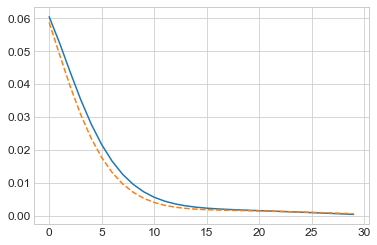

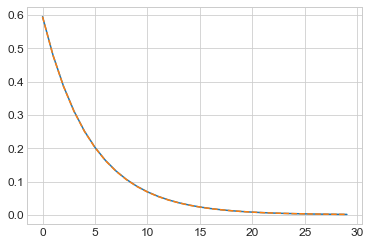

In [15]:
dC = (model.path.C[0,:30]/model.ss.C-1)*100
dC_block = (model_block.path.C[0,:30]/model_block.ss.C-1)*100

plt.plot(dC)
plt.plot(dC_block, '--')
plt.show()

dG = (model.path.G[0,:30]/model.ss.G-1)*100
dG_block = (model_block.path.G[0,:30]/model_block.ss.G-1)*100

plt.plot(dG)
plt.plot(dG_block, '--')
plt.show()

## Higher T

In [2]:
model =  HANKModelClass(name='baseline', par={'T' : 1000})
model.par.HH_type = 'RA-IM'


for i in range(2):
    model.find_ss(do_print=False)    
    model.compute_jacs(do_print=True,skip_shocks=True,skip_hh=True)
    utils.Create_shock('G_exo', model, 0.001)
    model.find_transition_path(do_print=False)

full Jacobians:
full Jacobian to unknowns computed in 1.0 mins 44 secs [in evaluate_path(): 1.0 mins 21 secs]
full Jacobians:
full Jacobian to unknowns computed in 31.0 secs [in evaluate_path(): 8.5 secs]


In [2]:
model =  HANKModelClass(name='baseline', par={'T' : 1500})
model.par.HH_type = 'RA-IM'


for i in range(2):
    model.find_ss(do_print=False)    
    model.compute_jacs(do_print=True,skip_shocks=True,skip_hh=True)
    utils.Create_shock('G_exo', model, 0.001)
    model.find_transition_path(do_print=False)

full Jacobians:
full Jacobian to unknowns computed in 2.0 mins 24 secs [in evaluate_path(): 1.0 mins 34 secs]
full Jacobians:
full Jacobian to unknowns computed in 1.0 mins 10 secs [in evaluate_path(): 19.3 secs]
